# PCA - An example on Exploratory Data Analysis

In this notebook you will:

- Replicate Andrew's example on PCA
- Visualize how PCA works on a 2-dimensional small dataset and that not every projection is "good"
- Visualize how a 3-dimensional data can also be contained in a 2-dimensional subspace
- Use PCA to find hidden patterns in a high-dimensional dataset

## Importing the libraries

In [56]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA # The core PCA algorithm from scikit-learn to reduce dimensionality.
from pca_utils import plot_widget # A helper function (from your course utilities) to create interactive PCA plots in the notebook.
from bokeh.io import show, output_notebook #Bokeh is used in PCA notebooks to make the plots interactive, so you can visually explore high-dimensional data projections and principal components in a dynamic way.
from bokeh.plotting import figure #Create figures (axes, points, lines) for Bokeh visualizations.
import matplotlib.pyplot as plt
import plotly.offline as py # Another option for interactive plots, similar to Bokeh, but using Plotly.

In [57]:
py.init_notebook_mode() # This tells Plotly to render interactive plots directly inside the notebook instead of opening a separate browser window.

In [58]:
output_notebook() #output_notebook() is the Bokeh equivalent of py.init_notebook_mode() for Plotly. It tells Bokeh to render its interactive plots inside the Jupyter notebook rather than opening a separate browser window.

Loading BokehJS ...

## Lecture Example

We are going to work on the same example that Andrew has shown in the lecture.

In [59]:
X = np.array([[ 99,  -1],
       [ 98,  -1],
       [ 97,  -2],
       [101,   1],
       [102,   1],
       [103,   2]])

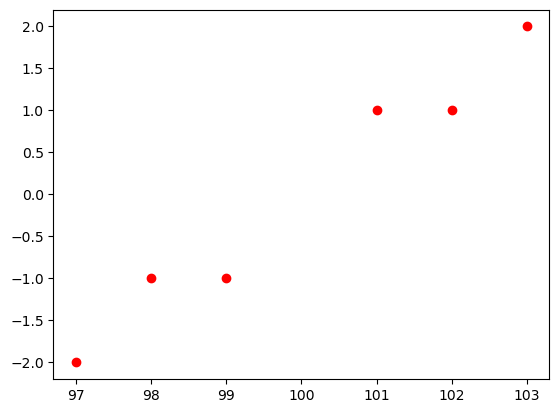

In [60]:
plt.plot(X[:,0], X[:,1], 'ro')
# 'ro':
# 'r' → red color
# 'o' → circle marker
# So all points will be red circles.

In [61]:
# Loading the PCA algorithm
pca_2 = PCA(n_components=2)
pca_2

# PCA(n_components=2)
#     You are creating a PCA object that will compute 2 principal components.
#     This means: if you fit this PCA to a dataset, it will find 2 new axes (z1 and z2) that capture the maximum variance in your data.
#     The data can then be projected onto these axes to reduce dimensionality or analyze variance.
# pca_2 (printing the object)
#     Just printing pca_2 does not fit the data yet.
#     It’s just a PCA instance, ready to be fitted with .fit() or .fit_transform().

PCA(n_components=2)

Output Explained

n_components = 2 → PCA will compute 2 principal components.

copy = True → The data will be copied before processing, so the original dataset X stays unchanged.

whiten = False → The components won’t be scaled to unit variance; the original variance is kept.

svd_solver = 'auto' → The algorithm automatically chooses the method for computing singular value decomposition (SVD).

tol = 0.0 → Tolerance for SVD solver (used if svd_solver='arpack').

iterated_power = 'auto' → Number of iterations for computing largest singular values (if using randomized SVD).

n_oversamples = 10 → Extra dimensions to improve accuracy in randomized SVD.

power_iteration_normalizer = 'auto' → How intermediate vectors are normalized in SVD.

random_state = None → No fixed random seed; SVD is not reproducible unless you set a seed.

In [62]:
# Let's fit the data. We do not need to scale it, since sklearn's implementation already handles it.
pca_2.fit(X)

# Now you’ve fitted the PCA model to your dataset X.
# At this stage:
# pca_2.components_ → contains the directions of the 2 principal components (the axes in the new feature space).
# pca_2.explained_variance_ → the amount of variance captured by each component.
# pca_2.explained_variance_ratio_ → the percentage of total variance captured by each component.

# You can check them like this:
# print("Principal components:\n", pca_2.components_)
# print("Variance captured by each component:\n", pca_2.explained_variance_)
# print("Percentage of variance explained:\n", pca_2.explained_variance_ratio_)

# After that, if you want to project your original data onto the 2 principal components, you can do:
# X_pca = pca_2.transform(X)
# print("Projected data:\n", X_pca)
# This will give you a 2D representation of your original data in the PCA space.

PCA(n_components=2)

In [63]:
pca_2.explained_variance_ratio_ #the percentage of total variance captured by each component.

array([0.99244289, 0.00755711])

The coordinates on the first principal component (first axis) are enough to retain 99.24% of the information ("explained variance").  The second principal component adds an additional 0.76% of the information ("explained variance") that is not stored in the first principal component coordinates.

In [64]:
X_trans_2 = pca_2.transform(X) #project your original data onto these 2 principal components.
X_trans_2

array([[-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385],
       [ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385]])

Think of column 1 as the coordinate along the first principal component (the first new axis) and column 2 as the coordinate along the second principal component (the second new axis).

You can probably just choose the first principal component since it retains 99% of the information (explained variance).

In [65]:
pca_1 = PCA(n_components=1)
pca_1

PCA(n_components=1)

In [66]:
pca_1.fit(X)
pca_1.explained_variance_ratio_

array([0.99244289])

In [67]:
X_trans_1 = pca_1.transform(X)
X_trans_1

array([[-1.38340578],
       [-2.22189802],
       [-3.6053038 ],
       [ 1.38340578],
       [ 2.22189802],
       [ 3.6053038 ]])

Notice how this column is just the first column of `X_trans_2`.

If you had 2 features (two columns of data) and choose 2 principal components, then you'll keep all the information and the data will end up the same as the original.

In [68]:
X_reduced_2 = pca_2.inverse_transform(X_trans_2)
X_reduced_2

array([[ 99.,  -1.],
       [ 98.,  -1.],
       [ 97.,  -2.],
       [101.,   1.],
       [102.,   1.],
       [103.,   2.]])

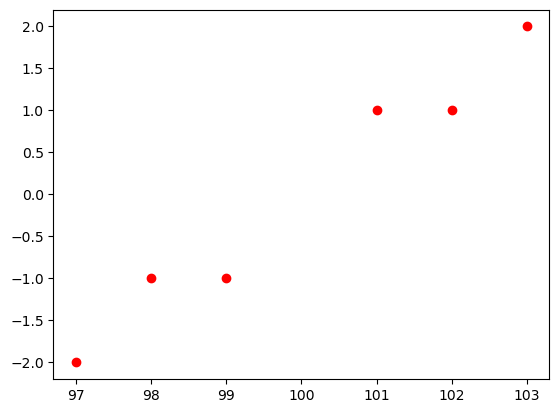

In [69]:
plt.plot(X_reduced_2[:,0], X_reduced_2[:,1], 'ro')

Reduce to 1 dimension instead of 2

In [70]:
X_reduced_1 = pca_1.inverse_transform(X_trans_1)
X_reduced_1

array([[ 98.84002499,  -0.75383654],
       [ 98.13695576,  -1.21074232],
       [ 96.97698075,  -1.96457886],
       [101.15997501,   0.75383654],
       [101.86304424,   1.21074232],
       [103.02301925,   1.96457886]])

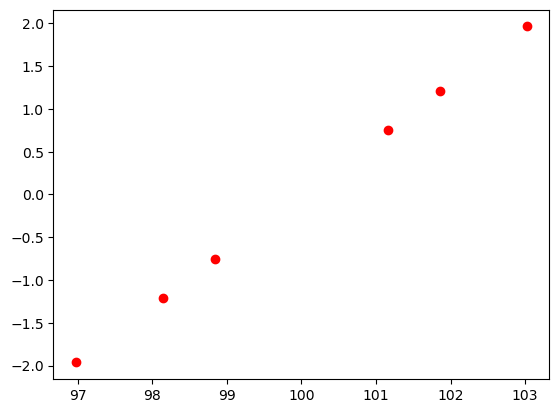

In [71]:
plt.plot(X_reduced_1[:,0], X_reduced_1[:,1], 'ro')

Notice how the data are now just on a single line (this line is the single principal component that was used to describe the data; and each example had a single "coordinate" along that axis to describe its location.

## Visualizing the PCA algorithm

Let's define $10$ points in the plane and use them as an example to visualize how we can compress this points in 1 dimension. You will see that there are good ways and bad ways.

In [72]:
X = np.array([[-0.83934975, -0.21160323],
       [ 0.67508491,  0.25113527],
       [-0.05495253,  0.36339613],
       [-0.57524042,  0.24450324],
       [ 0.58468572,  0.95337657],
       [ 0.5663363 ,  0.07555096],
       [-0.50228538, -0.65749982],
       [-0.14075593,  0.02713815],
       [ 0.2587186 , -0.26890678],
       [ 0.02775847, -0.77709049]])

In [73]:
p = figure(title = '10-point scatterplot', x_axis_label = 'x-axis', y_axis_label = 'y-axis') ## Creates the figure object
p.scatter(X[:,0],X[:,1],marker = 'o', color = '#C00000', size = 5) ## Add the scatter plot

## Some visual adjustments
p.grid.visible = False
p.grid.visible = False
p.outline_line_color = None 
p.toolbar.logo = None
p.toolbar_location = None
p.xaxis.axis_line_color = "#f0f0f0"
p.xaxis.axis_line_width = 5
p.yaxis.axis_line_color = "#f0f0f0"
p.yaxis.axis_line_width = 5

## Shows the figure
show(p)

The next code will generate a widget where you can see how different ways of compressing this data into 1-dimensional datapoints will lead to different ways on how the points are spread in this new space. The line generated by PCA is the line that keeps the points as far as possible from each other. 

You can use the slider to rotate the black line through its center and see how the points' projection onto the line will change as we rotate the line. 

You can notice that there are projections that place different points in almost the same point, and there are projections that keep the points as separated as they were in the plane.

In [74]:
fig = plot_widget()
fig

    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              …

## Visualization of a 3-dimensional dataset 

In this section we will see how some 3 dimensional data can be condensed into a 2 dimensional space. 

In [75]:
from pca_utils import random_point_circle, plot_3d_2d_graphs
# random_point_circle is usually a utility to generate points around a circle for visualization, often used to illustrate rotation, projections, or synthetic 2D/3D datasets.
# plot_3d_2d_graphs is typically a helper for visualizing PCA in both 3D and 2D simultaneously: you can see how the original high-dimensional points project down to principal components.

In [76]:
X = random_point_circle(n = 150)

In [77]:
deb = plot_3d_2d_graphs(X)

In [78]:
deb.update_layout(yaxis2 = dict(title_text = 'test', visible=True))

## Using PCA in Exploratory Data Analysis

Let's load a toy dataset with $500$ samples and $1000$ features.

In [79]:
df = pd.read_csv("toy_dataset.csv")

In [80]:
df.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  27.422157 -29.662712 -23.297163 -15.161935   0.345581   3.706750   
1   3.489482 -19.153551 -14.636424  14.688258  20.114204  13.532852   
2   4.293509  22.691579  -1.045155  -8.740350  12.401082  31.362987   
3  -2.139348  23.158754 -26.241206  19.426465   9.472049   8.453948   
4 -35.251034  27.281816 -29.470282 -21.786865  11.806822  58.655133   

   feature_6  feature_7  feature_8  feature_9  ...  feature_990  feature_991  \
0  -5.507209 -46.992476   5.175469 -47.768145  ...     7.815960    24.320965   
1  34.298084  22.982509  37.938670 -35.648144  ...    11.145527   -38.886603   
2 -18.831206 -35.384557   8.161430 -16.421762  ...    48.190331    -0.503157   
3   0.637211 -26.675984 -43.823329  11.840874  ...   -51.613076    13.278858   
4   5.375230  59.740676 -49.007717 -21.801155  ...     0.010857    20.975655   

   feature_992  feature_993  feature_994  feature_995  feature_996  \
0   -33.987522    22.306088    31.173511    31.264830     8.380699   
1    44.579337    37.308519    29.560535   -10.643331    -6.499263   
2   -21.740678    15.972237     1.122335   -45.473538    10.518065   
3   -44.179281    32.912282     4.805774     3.960836   -15.888356   
4   -21.358371    18.709369    22.362477    41.214565    -7.217724   

   feature_997  feature_998  feature_999  
0   -25.843189    36.706408   -43.480792  
1    19.921666    -3.528982    31.068739  
2    -5.818320   -29.466301   -13.676685  
3    61.384773    33.112334     5.088320  
4    31.173870    37.097532   -27.509420  

[5 rows x 1000 columns]

This is a dataset with $1000$ features.

Let's try to see if there is a pattern in the data. The following function will randomly sample 100 pairwise tuples (x,y) of features, so we can scatter-plot them.


In [81]:
import random

def get_pairs(df, n=100):
    # Function takes:
        # df → a pandas DataFrame whose column pairs we want.
        # n=100 → number of unique pairs to generate (default 100).
    tuples_set = set()  # use a set for faster lookup
    columns = list(df.columns)
    num_cols = len(columns)
    # tuples_set = set(): Stores the pairs as a set instead of a list. Sets are fast for checking duplicates, so no need to loop through a list.
    # columns = list(df.columns): Makes a list of all column names.
    # num_cols = len(columns): Stores the number of columns (might be used later, though not strictly needed here).
    
    while len(tuples_set) < n: # Keep generating pairs until the set contains n unique pairs. Using the set automatically avoids duplicates.
        x, y = random.sample(columns, 2)  # ensures x != y automatically
        '''
        random.sample(columns, 2) picks 2 unique items from columns. No need to check x != y because random.sample guarantees the two items are distinct.
        '''
        # store as a sorted tuple to avoid duplicates like (a,b) and (b,a)
        pair = tuple(sorted((x, y)))
        '''
        Converts (x, y) into a sorted tuple.
        Example: if x='A' and y='B', it becomes ('A', 'B').
        If the function later picks ('B', 'A'), sorting ensures it’s recognized as the same pair → avoids duplicates.
        '''
        tuples_set.add(pair)
        '''
        Adds the sorted tuple to the set.
        If the pair already exists in the set, nothing happens.
        '''
    
    return list(tuples_set)
            

In [82]:
pairs = get_pairs(df)

Now let's plot them!

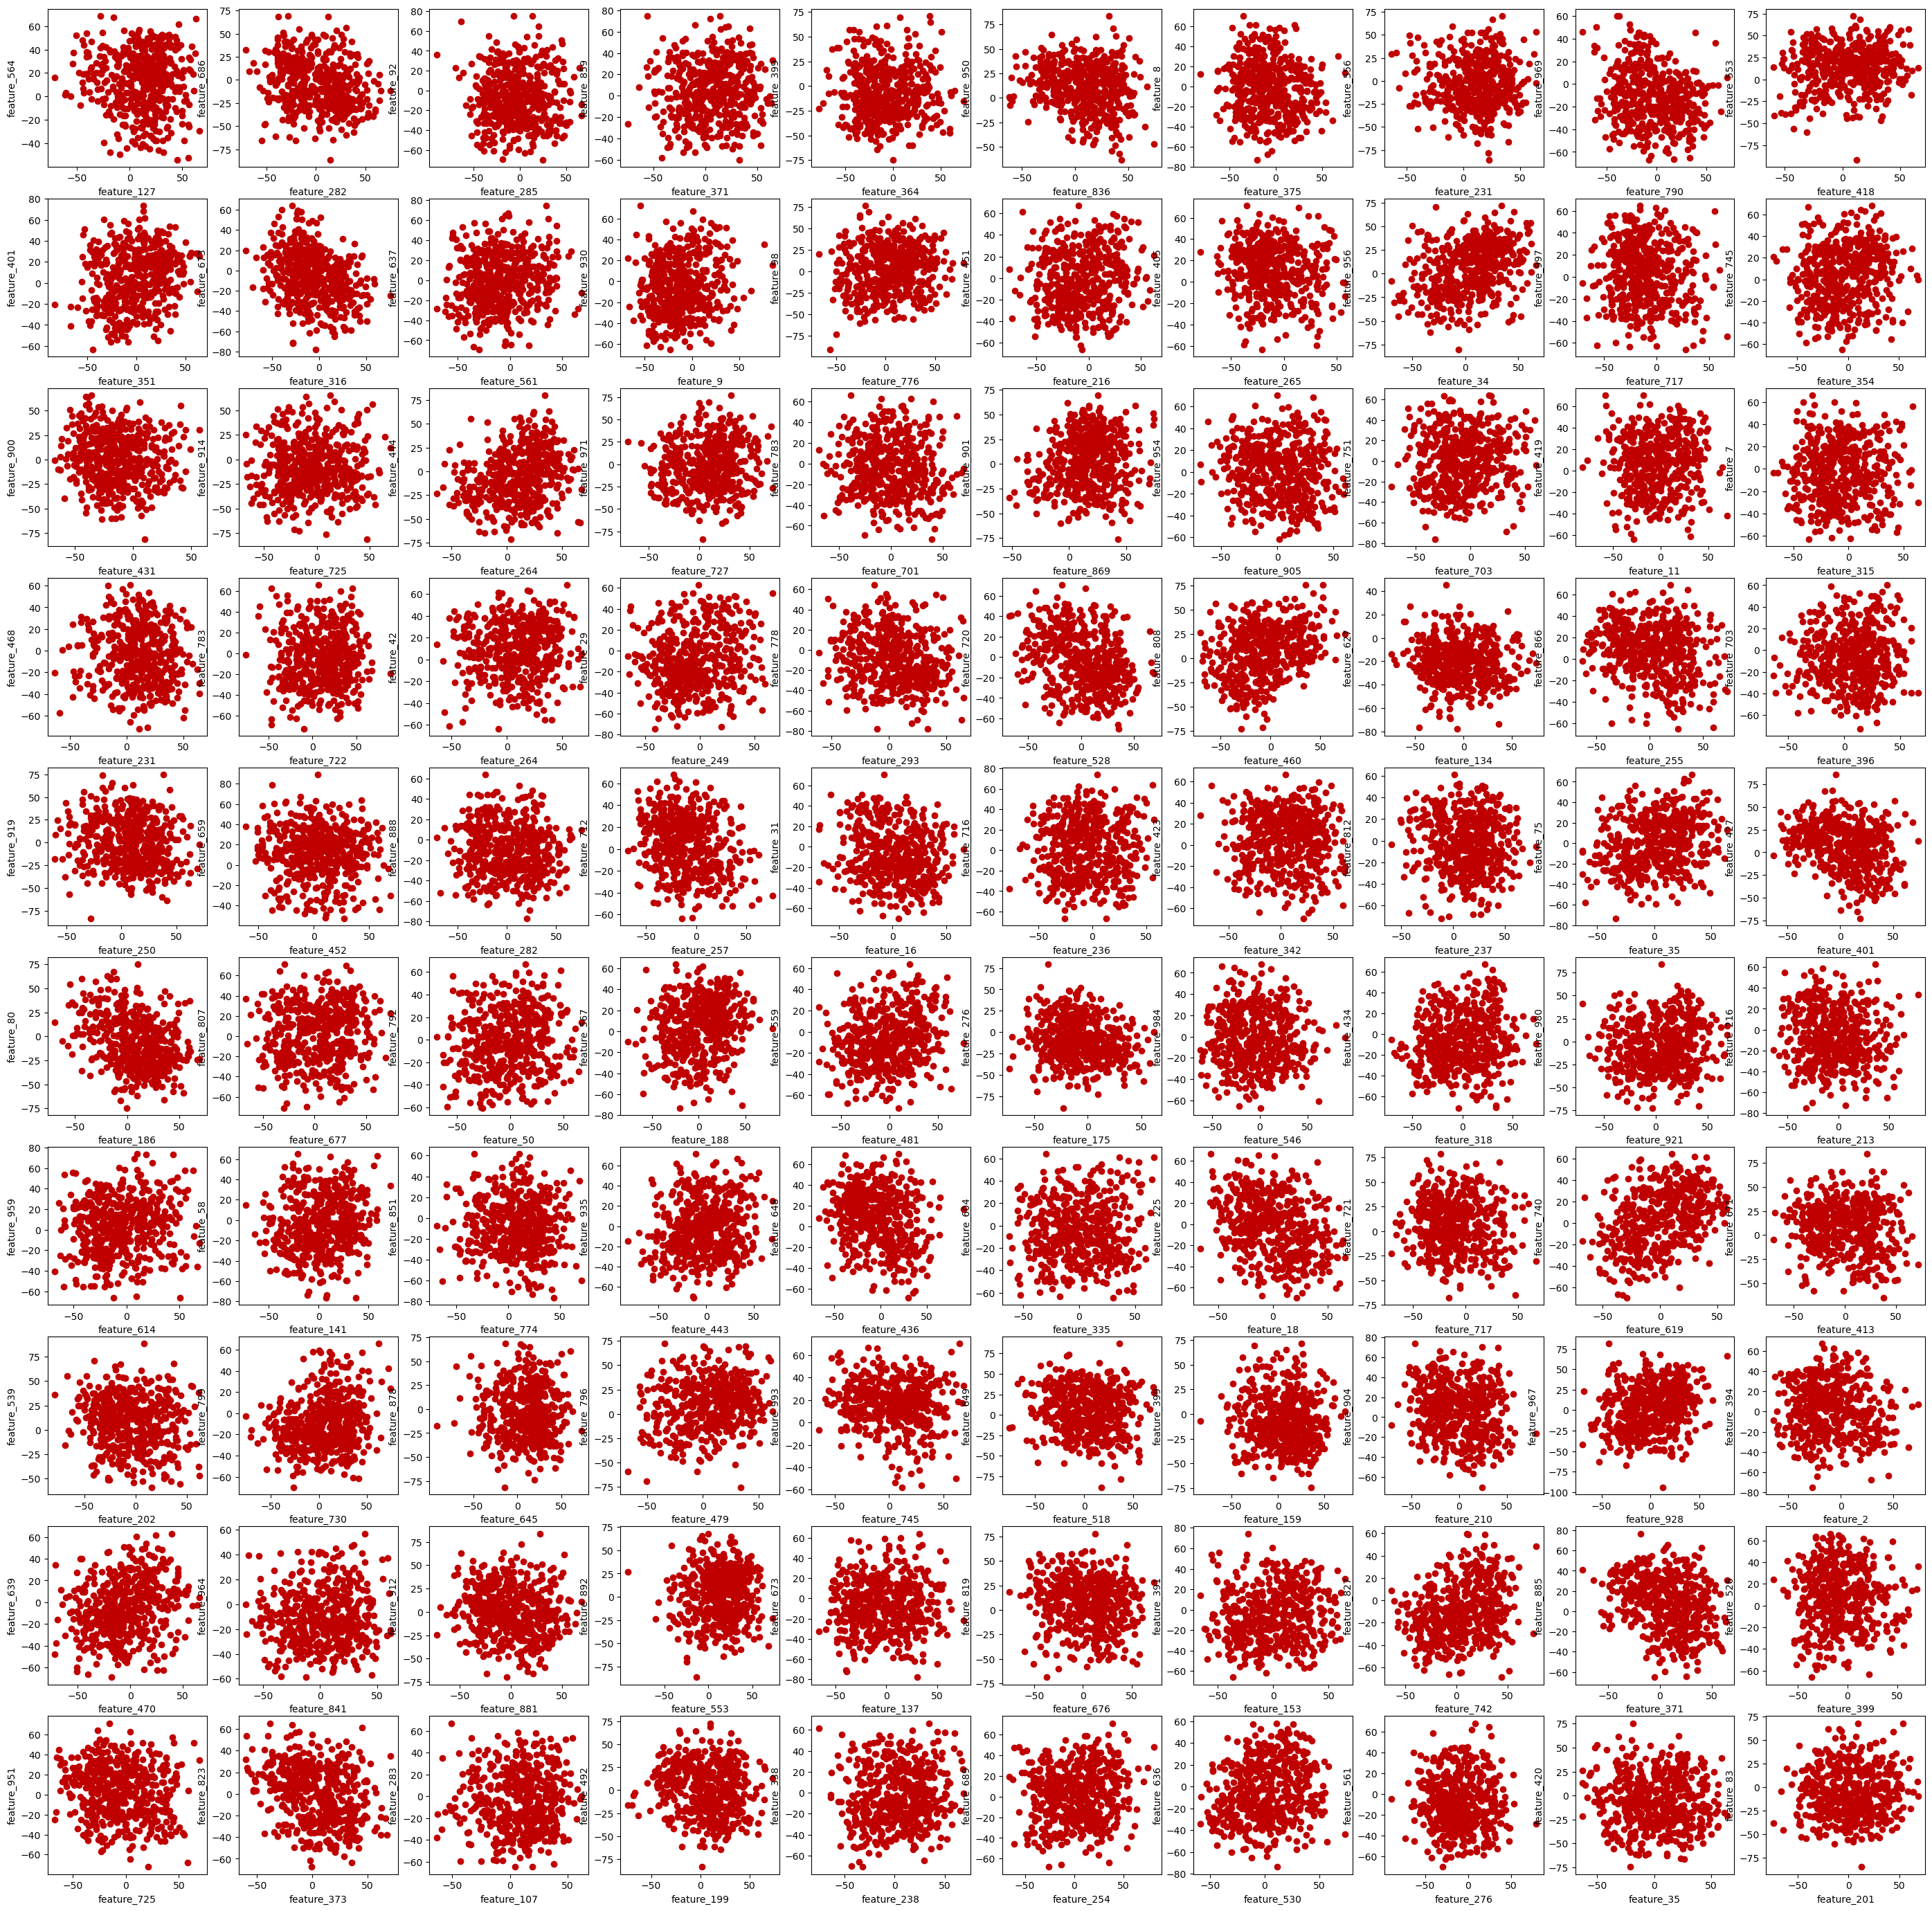

In [83]:
fig, axs = plt.subplots(10,10, figsize = (35,35))
'''
plt.subplots(10,10) → creates a 10×10 grid of axes, so 100 small plots in total.
axs is a 2D NumPy array of axes objects (shape 10×10).
figsize=(35,35) → makes the entire figure large so all 100 plots fit clearly.
fig → the overall figure object.
axs → the array of individual axes you can plot on.
'''
i = 0 #i keeps track of which pair from pairs we are plotting.
for rows in axs:
    for ax in rows:
        ax.scatter(df[pairs[i][0]],df[pairs[i][1]], color = "#C00000")
        '''
        pairs[i] → the i-th pair of columns from your pairs list.
        pairs[i][0] → x-axis column
        pairs[i][1] → y-axis column
        df[pairs[i][0]] → values from the first column in the pair
        df[pairs[i][1]] → values from the second column in the pair
        ax.scatter(..., color="#C00000") → plot red points for this scatter plot.
        '''
        ax.set_xlabel(pairs[i][0])
        ax.set_ylabel(pairs[i][1])
        '''
        Sets the x-label to the first column name of the pair.
        Sets the y-label to the second column name of the pair.
        '''
        i+=1
# axs is a 10×10 2D array.
# Outer loop → iterates over rows of axes.
# Inner loop → iterates over individual axes in that row.
# ax → the current subplot we’re going to plot in.

It looks like there is not much information hidden in pairwise features. Also, it is not possible to check every combination, due to the amount of features. Let's try to see the linear correlation between them.

In [84]:
# This may take 1 minute to run
corr = df.corr()
corr

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
feature_0     1.000000  -0.103722   0.015784  -0.033219  -0.415358  -0.266933   
feature_1    -0.103722   1.000000   0.337736  -0.171135   0.345884   0.185080   
feature_2     0.015784   0.337736   1.000000   0.013961   0.345145   0.299024   
feature_3    -0.033219  -0.171135   0.013961   1.000000   0.142227   0.183382   
feature_4    -0.415358   0.345884   0.345145   0.142227   1.000000   0.383280   
...                ...        ...        ...        ...        ...        ...   
feature_995   0.042612   0.018929   0.006617  -0.050576  -0.031877   0.002757   
feature_996   0.289716  -0.260189  -0.072219   0.199677  -0.233503   0.005054   
feature_997  -0.274962   0.235876   0.012333   0.040579   0.214242  -0.079437   
feature_998   0.027641  -0.210954  -0.229972  -0.014650  -0.199061   0.093945   
feature_999   0.049573   0.047979  -0.076818   0.171000   0.012381   0.052593   

             feature_6  feature_7  feature_8  feature_9  ...  feature_990  \
feature_0    -0.137141  -0.194403   0.162446  -0.083976  ...    -0.120494   
feature_1     0.208196  -0.044625  -0.079949  -0.001948  ...    -0.005403   
feature_2     0.039985  -0.100859  -0.038675  -0.154532  ...     0.209160   
feature_3     0.049378  -0.088616  -0.116847  -0.152066  ...    -0.040119   
feature_4     0.277062   0.180477  -0.096038  -0.016284  ...     0.220092   
...                ...        ...        ...        ...  ...          ...   
feature_995   0.131874  -0.085383  -0.005111   0.348188  ...     0.024636   
feature_996  -0.197800  -0.068711  -0.263666  -0.201586  ...    -0.265101   
feature_997   0.143915  -0.141962   0.029627   0.210807  ...     0.013300   
feature_998  -0.087634  -0.147473  -0.048616   0.280748  ...    -0.065135   
feature_999   0.192966   0.072101   0.252028  -0.161262  ...     0.041341   

             feature_991  feature_992  feature_993  feature_994  feature_995  \
feature_0       0.020968     0.078680    -0.033252     0.076851     0.042612   
feature_1       0.123397    -0.250359    -0.090698     0.044208     0.018929   
feature_2       0.232511    -0.061087    -0.135484    -0.111952     0.006617   
feature_3      -0.256840    -0.015278    -0.185727    -0.144647    -0.050576   
feature_4       0.101415    -0.006388    -0.115772    -0.004572    -0.031877   
...                  ...          ...          ...          ...          ...   
feature_995     0.300726    -0.111659    -0.174067     0.176845     1.000000   
feature_996     0.042686    -0.042798    -0.141298    -0.022569     0.007601   
feature_997    -0.059288    -0.125165    -0.183001     0.040979     0.108621   
feature_998     0.040369    -0.200637     0.140856    -0.071527     0.332544   
feature_999    -0.510034     0.071651     0.084861    -0.092606    -0.374151   

             feature_996  feature_997  feature_998  feature_999  
feature_0       0.289716    -0.274962     0.027641     0.049573  
feature_1      -0.260189     0.235876    -0.210954     0.047979  
feature_2      -0.072219     0.012333    -0.229972    -0.076818  
feature_3       0.199677     0.040579    -0.014650     0.171000  
feature_4      -0.233503     0.214242    -0.199061     0.012381  
...                  ...          ...          ...          ...  
feature_995     0.007601     0.108621     0.332544    -0.374151  
feature_996     1.000000    -0.297023     0.093343    -0.167742  
feature_997    -0.297023     1.000000    -0.085454    -0.056337  
feature_998     0.093343    -0.085454     1.000000    -0.126505  
feature_999    -0.167742    -0.056337    -0.126505     1.000000  

[1000 rows x 1000 columns]

In [85]:
## This will show all the features that have correlation > 0.5 in absolute value. We remove the features 
## with correlation == 1 to remove the correlation of a feature with itself

mask = (abs(corr) > 0.5) & (abs(corr) != 1)
corr.where(mask).stack().sort_values(ascending=False)


# 1️⃣ mask = (abs(corr) > 0.5) & (abs(corr) != 1)
# corr → usually a correlation matrix, e.g., df.corr().
# Each element corr[i,j] is the correlation between column i and column j.
# Values range from -1 to 1.
# abs(corr) → takes the absolute value of correlations.
# Now all correlations are positive numbers between 0 and 1.
# (abs(corr) > 0.5) → True for all correlations with magnitude > 0.5.
# (abs(corr) != 1) → removes perfect correlations (1 or -1).
# Perfect correlations appear on the diagonal of the correlation matrix.
# & → logical AND → keeps only correlations that are moderately high but not perfect.
# Result: mask is a boolean matrix of the same shape as corr.
# True → correlation we want to keep
# False → correlation to ignore
# 2️⃣ corr.where(mask)
# DataFrame.where(condition) → keeps values where the condition is True, replaces the rest with NaN.
# So now we have a correlation matrix with:
# Only values >0.5 (in magnitude) and not equal to 1
# Everything else → NaN
# 3️⃣ .stack()
# DataFrame.stack() → compresses the DataFrame into a Series:
# Only keeps the non-NaN values
# MultiIndex → index contains the original row and column names
# After stacking, you get a Series of pairs of variables with correlation > 0.5
# 4️⃣ .sort_values()
# Sorts the Series by correlation value, ascending by default.
# Now you can see all strong correlations in order, from smallest to largest (ignoring perfect correlations).

feature_985  feature_395    0.632593
feature_395  feature_985    0.632593
feature_965  feature_35     0.631424
feature_35   feature_965    0.631424
feature_547  feature_792    0.620864
                              ...   
feature_716  feature_1     -0.609056
feature_4    feature_313   -0.615317
feature_313  feature_4     -0.615317
feature_81   feature_657   -0.631294
feature_657  feature_81    -0.631294
Length: 1870, dtype: float64

In [86]:
dfhh = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})
print(dfhh)
#output:
#    A  B  C
# 0  1  4  7
# 1  2  5  8
# 2  3  6  9


   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9


In [87]:
stacked = dfhh.stack()
print(stacked)

0  A    1
   B    4
   C    7
1  A    2
   B    5
   C    8
2  A    3
   B    6
   C    9
dtype: int64


In [88]:
stacked.sort_values()

0  A    1
1  A    2
2  A    3
0  B    4
1  B    5
2  B    6
0  C    7
1  C    8
2  C    9
dtype: int64

The maximum and minimum correlation is around $0.631$ - $0.632$. This does not show too much as well. 

Let's try PCA decomposition to compress our data into a 2-dimensional subspace (plane) so we can plot it as scatter plot. 

In [98]:
df.shape

(500, 1000)

In [ ]:
# Loading the PCA object
pca = PCA(n_components = 2) # Here we choose the number of components that we will keep.
X_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(X_pca, columns = ['principal_component_1','principal_component_2'])
X_pca.shape #(500, 2)

(500, 2)

In [90]:
df_pca.head()

principal_component_1  principal_component_2
0              46.235641              -1.672797
1             210.208758             -84.068249
2              26.352795            -127.895751
3             116.106804            -269.368256
4             110.183605            -279.657306

Text(0.5, 1.0, 'PCA decomposition')

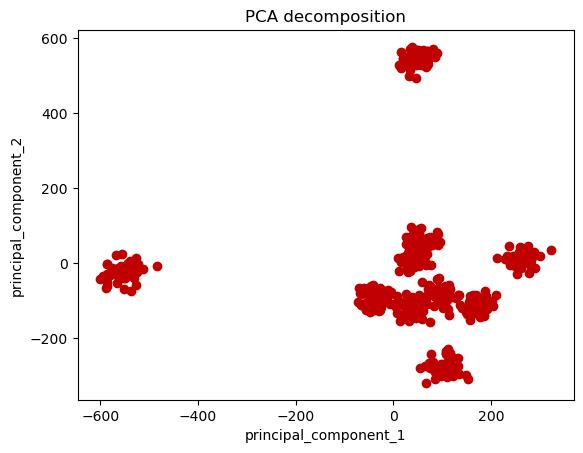

In [91]:
plt.scatter(df_pca['principal_component_1'],df_pca['principal_component_2'], color = "#C00000")
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2')
plt.title('PCA decomposition')

This is great! We can see well defined clusters. 

In [99]:
pca.explained_variance_ratio_

array([0.07898605, 0.06674239])

In [92]:
# pca.explained_variance_ration_ returns a list where it shows the amount of variance explained by each principal component.
sum(pca.explained_variance_ratio_)

np.float64(0.14572843555106257)

And we preserved only around 14.6% of the variance!

Quite impressive! We can clearly see clusters in our data, something that we could not see before. How many clusters can you spot? 8, 10? 

If we run a PCA to plot 3 dimensions, we will get more information from data.


In [ ]:
pca_3 = PCA(n_components = 3).fit(df)
X_t = pca_3.transform(df)
#the same as:
# pca_3 = PCA(n_components = 3)
# X_t = pca_3.fit_transform(df)
df_pca_3 = pd.DataFrame(X_t,columns = ['principal_component_1','principal_component_2','principal_component_3'])

In [94]:
import plotly.express as px

In [100]:
fig = px.scatter_3d(df_pca_3, x = 'principal_component_1', y = 'principal_component_2', z = 'principal_component_3').update_traces(marker = dict(color = "#C00000"))
fig.show()

In [96]:
sum(pca_3.explained_variance_ratio_)

np.float64(0.2080625781609327)

Now we preserved 19% of the variance and we can clearly see 10 clusters.

Congratulations on finishing this notebook!